In [4]:
import torch
import numpy as np
from matplotlib import pyplot as plt


def visualize_2d(pts):
    pts = pts.detach().cpu().squeeze().numpy()
    fig = plt.figure(figsize=(3, 3))
    ax1 = fig.add_subplot(111)
    ax1.scatter(pts[:, 0], pts[:, 1])
    ax1.set_xlim(-10, 10)
    ax1.set_ylim(-10, 10)

def get_prior(num_points, inp_dim):
    return torch.randn(num_points, inp_dim) + 5.

def langevin_dynamics(model, sigmas, num_points=100, dim=2, eps=2*1e-2, num_steps=10):
    with torch.no_grad():
        x_list = []
        x = get_prior(num_points, dim).cuda()
        x_list.append(x.clone())
        for sigma in sigmas:
            alpha = eps * ((sigma / sigmas[-1]) ** 2)
            for t in range(num_steps):
                z_t = torch.randn_like(x)
                x += torch.sqrt(alpha) * z_t + (alpha / 2.) * model(x)
            x_list.append(x.clone())
        
        return x, x_list
    
def langevin_dynamics_lsd(model, sigma=0.01, num_points=100, dim=2, eps=1, num_steps=10):
    with torch.no_grad():
        x_list = []
        x = get_prior(num_points, dim).cuda()
        x_list.append(x.clone())
        for t in range(num_steps):
            z_t = torch.randn_like(x)
            x += sigma * z_t + eps * model(x)
            x_list.append(x.clone())
        
        return x, x_list

eps=0.1, num_steps=50
5.001774311065674
0.43645697832107544


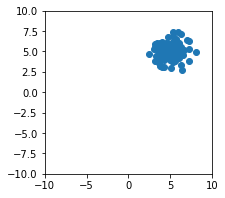

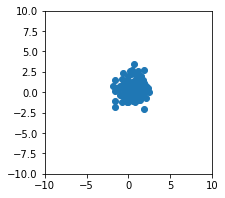

In [2]:
f = lambda x: -x  # score function 

device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

sigma_begin = 1.
sigma_end = 0.01
num_classes = 10
np_sigmas = np.exp(np.linspace(np.log(sigma_begin), np.log(sigma_end), num_classes))
sigmas = torch.tensor(np.array(np_sigmas)).float().to(device).view(-1, 1)
sigmas = sigmas[-1:]
eps = 0.1
num_steps = 50
pt_cl, pt_cl_list = langevin_dynamics(f, sigmas, dim=2, num_points=100, eps=eps, num_steps=num_steps)

print('eps={}, num_steps={}'.format(eps, num_steps))
for pt_cl_item in pt_cl_list:
    print(pt_cl_item.mean().detach().cpu().item())
    visualize_2d(pt_cl_item)


eps=0.5, num_steps=10
5.048639297485352
2.5226964950561523
1.2607450485229492
0.6305178999900818
0.3153661787509918
0.15856608748435974
0.0788024514913559
0.03942730277776718
0.021202515810728073
0.01074233278632164
0.005402695387601852


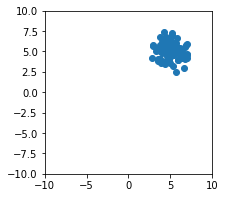

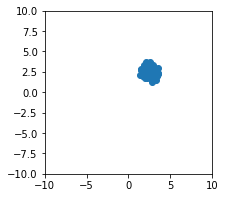

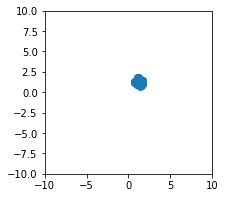

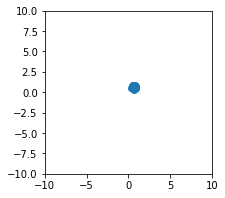

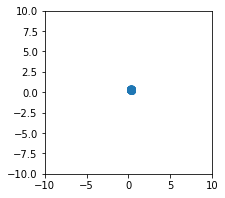

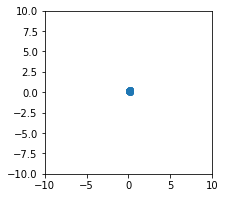

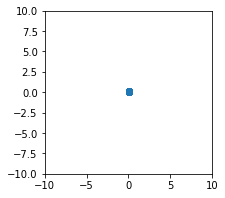

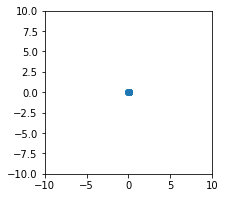

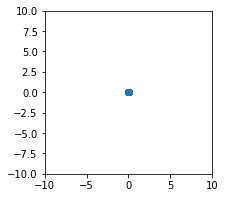

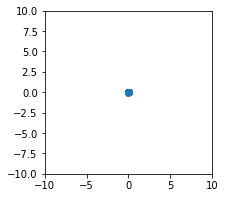

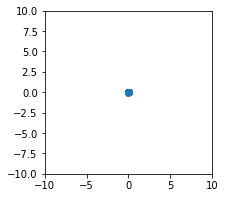

In [10]:
f = lambda x: -x  # score function 

device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

eps = 0.5
num_steps = 10
sigma=0.01
pt_cl, pt_cl_list = langevin_dynamics_lsd(f, sigma, dim=2, num_points=100, eps=eps, num_steps=num_steps)

print('eps={}, num_steps={}'.format(eps, num_steps))
for pt_cl_item in pt_cl_list:
    print(pt_cl_item.mean().detach().cpu().item())
    visualize_2d(pt_cl_item)
